**In this notebook we see that how to perform EDA in time series. TIme series has its own steps of EDA. Pandas datareader is a library from which we can fetch live share prices of any stock. To perform same task we have other libraries also such as google finance sheet, yahoo finance sheet. These are the libraries by which we can directly fetch the live data but the thing is that now they become commercialize, so we have to purchase API keys to access them.**

In [1]:
# !pip install pandas-datareader

In [2]:
# !pip install yfinance

In [3]:
# import required libraries

import pandas_datareader as pdr
import yfinance as yf
import pandas as pd
from datetime import datetime

In [4]:
# Code to import data using pandas_datareader

# df_tesla = pdr.get_data_yahoo("TSLA")
# df_tesla.tail(10)

**This code 'get_data_yahoo("Stock_name")' pulls data from yahoo finance sheet.** 

In [5]:
# Code to import data of specific time period

# df_tesla = yf.download('TSLA', start='2023-01-01', end='2023-08-01')
# df_tesla.tail()

In [6]:
df_tesla = yf.download('TSLA')
df_tesla.tail(10)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-08,247.449997,250.919998,245.009995,249.699997,249.699997,96642200
2023-08-09,250.869995,251.100006,241.899994,242.190002,242.190002,101596300
2023-08-10,245.399994,251.800003,243.000000,245.339996,245.339996,109498600
2023-08-11,241.770004,243.789993,238.020004,242.649994,242.649994,98866600
2023-08-14,235.699997,240.660004,233.750000,239.759995,239.759995,98595300
2023-08-15,238.729996,240.500000,232.610001,232.960007,232.960007,88197600
2023-08-16,228.020004,233.970001,225.380005,225.600006,225.600006,112484500
2023-08-17,226.059998,226.740005,218.830002,219.220001,219.220001,120718400
2023-08-18,214.119995,217.580002,212.360001,215.490005,215.490005,135813700


* **`Date Format`: Year-Month-Date**


* **`Volume`: The number of shares that were bought or sold on a particular day, or the number of shares traded on a particular day. Volume is considered an important factor because higher trading volume of shares is regarded as better. When we are selling or purchasing shares, they can be easily sold and bought.**


* **If the volume of shares is low, it is recommended not to trade in that particular stock because selling may not occur easily when desired, and buying the stock may also face difficulties.**


* **In time series we have to predict only one variable at a time this is not possible that we can predict more than one variable at a time.**


* **The Indian stock market closes at 3:15 PM. The `"Close"` variable represents the stock price at 3:15 PM.**


* **From 3:15 to 3:30 PM, a 15-minute window is allocated to stock market operators to perform tasks like finalizing trades. During this time, adjustments might be made. The `"Adj. Close"` variable signifies the closing price at 3:30 PM, reflecting the final value after this adjustment period.**


* **The closing price at 3:15 PM and 3:30 PM is nearly the same.**


* **For analysis, we should focus on the closing price at 3:15 PM rather than the adjusted closing price.**

<AxesSubplot:xlabel='Date'>

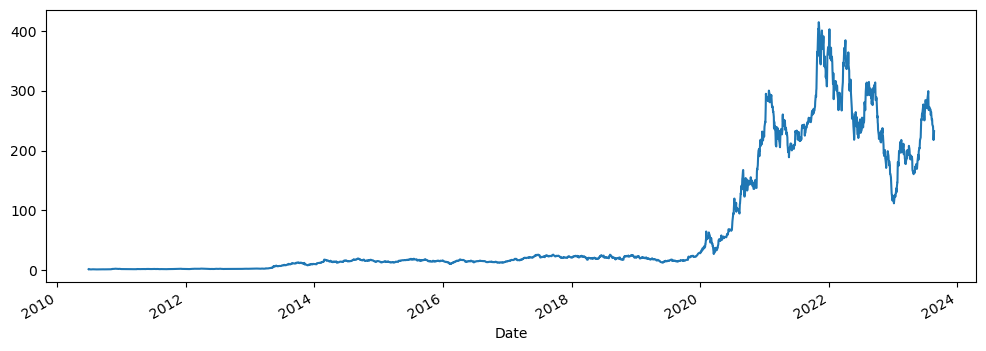

In [7]:
df_tesla['High'].plot(figsize=(12,4))

* **When we look at this chart, we can see something significant happening in the year 2020. Before that year, the growth was consistent and steady. However, after 2020, there was an exceptional surge in growth. The share price increased by a factor of 8. This makes us wonder about the company behind this sudden extreme growth after 2020.**


* **There are two possibilities to consider. The first is that Tesla might have manipulated its stock price intentionally. The second is that Tesla could have reported much higher profits, leading to a sudden rise in its stock price. If any company in India were to show such a drastic growth pattern, it would attract the attention of SEBI (Securities and Exchange Board of India). SEBI would investigate what happened in the preceding 1-2 years that caused the stock price to suddenly rise by 8 times, from around 50 to approximately 400.**


* **Here, we have also applied a limit by focusing on a specific time period. This allows us to examine the chart within a particular timeframe.**

<AxesSubplot:xlabel='Date'>

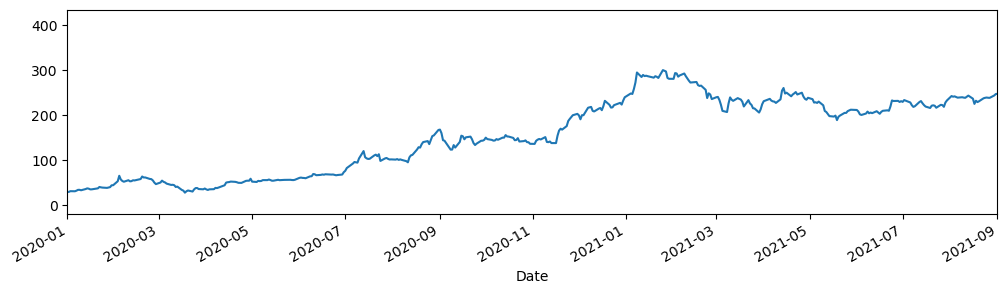

In [8]:
# x limit

df_tesla['High'].plot(xlim=['2020-01-01', '2021-09-01'], figsize=(12, 3))

**# By using `xlim` we can plot the graph of specific time period.**

<AxesSubplot:xlabel='Date'>

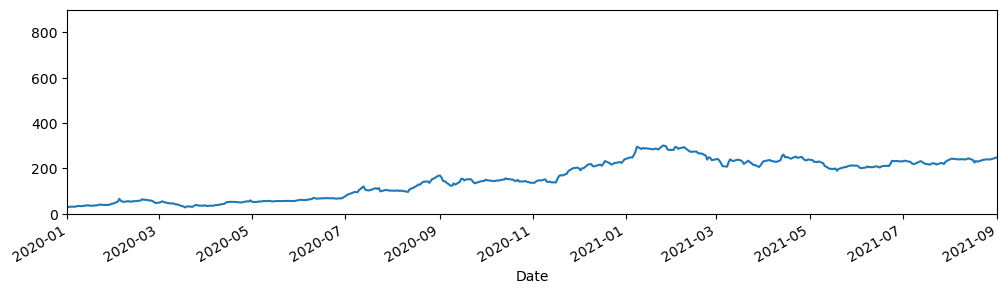

In [9]:
# xlimit and y limit

df_tesla['High'].plot(xlim=['2020-01-01', '2021-09-01'],ylim=[0,900], figsize=(12,3))

**# By using the `ylim` parameter in plotting functions, you can set the limits of the y-axis, which can help you control the range displayed on the vertical axis. This can be useful to focus on specific ranges of data or to better visualize variations in your data.**

<AxesSubplot:xlabel='Date'>

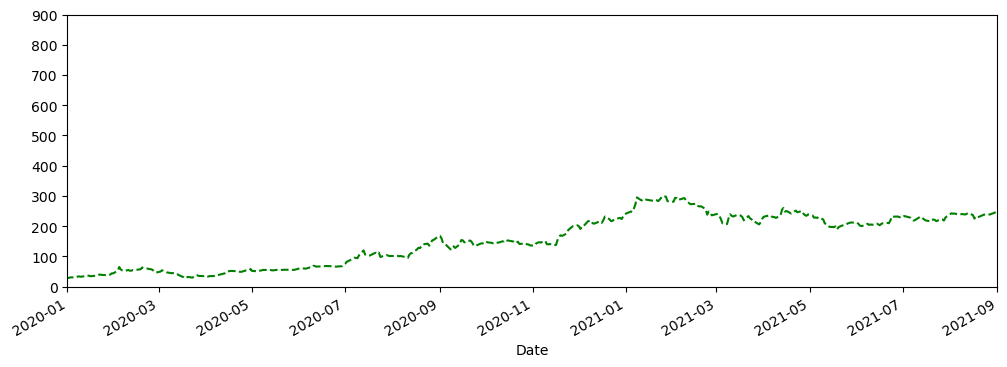

In [10]:
## xlimit and y limit and coloring

df_tesla['High'].plot(xlim=['2020-01-01', '2021-09-01'], ylim=[0, 900], figsize=(12, 4), linestyle='--', color='green')

In [11]:
df_tesla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2023-08-08', '2023-08-09', '2023-08-10', '2023-08-11',
               '2023-08-14', '2023-08-15', '2023-08-16', '2023-08-17',
               '2023-08-18', '2023-08-21'],
              dtype='datetime64[ns]', name='Date', length=3309, freq=None)

* **When we have a time variable, we need to convert it into a datetime object before we can use it as an index. This is because the datetime function only works on datetime objects. When we export data from Excel, the datetime variable may be converted to an object type. To convert it back to a datetime object, we can use the to_datetime() function.**


* **Once you've converted the variable's data type, you should set the time variable as the index.**


* **Time variable is already in the correct datetime format and has been set as the index. In this case, there's no further action needed for this variable.**

In [12]:
index = df_tesla.loc['2020-01-01':'2021-09-01'].index
share_open = df_tesla.loc['2020-01-01':'2021-09-01']['Open']
share_open

Date
2020-01-02     28.299999
2020-01-03     29.366667
2020-01-06     29.364668
2020-01-07     30.760000
2020-01-08     31.580000
                 ...    
2021-08-26    236.103333
2021-08-27    235.000000
2021-08-30    238.240005
2021-08-31    244.333328
2021-09-01    244.693329
Name: Open, Length: 421, dtype: float64

**Here, we check open prices.**

In [13]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-19', '2021-08-20', '2021-08-23', '2021-08-24',
               '2021-08-25', '2021-08-26', '2021-08-27', '2021-08-30',
               '2021-08-31', '2021-09-01'],
              dtype='datetime64[ns]', name='Date', length=421, freq=None)

**Here, we check for index.**

In [14]:
import matplotlib.pyplot as plt 
%matplotlib inline

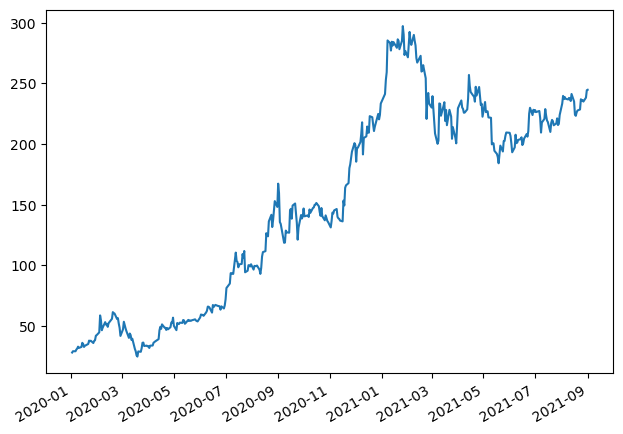

In [15]:
figure, axis=plt.subplots() 
plt.tight_layout() 
## Preventing overlapping 
axis.plot(index,share_open)
figure.autofmt_xdate()

* **This graph shows the opening stock prices from January 2020 to September 2021.**


* **We observed that after 2020, the stock price increased suddenly. Now, we want to understand whether the price rose quickly within a month or gradually over time. To do this, we'll analyze how the stock price changed—whether it was a slow and steady increase or a sudden jump.**


* **The stock price increased slowly and steadily until November 2021. However, after reaching 150, the price started rising exponentially and continued to do so until it reached 400.**


* **As data scientists, our task is to investigate what factors were responsible for this rapid increase in the given time period. Did Tesla introduce any new products? Did their profits suddenly surge? Did they receive any government approvals or expand their operations, like opening new plants in countries like Germany or Australia? It's important to determine whether the rise in stock price was due to increased sales, external events, or even the possibility of market manipulation. Our goal is to uncover the reasons behind this sudden and significant increase in Tesla's stock price.**

In [16]:
# Datetime index

In [17]:
df_tesla = df_tesla.reset_index()

**Here, by resetting the index, we remove the current indexing and replace it with a simple numerical sequence: 0, 1, 2, 3, and so on. This way, the data is organized using these numbers as the reference points.**

In [18]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3309 non-null   datetime64[ns]
 1   Open       3309 non-null   float64       
 2   High       3309 non-null   float64       
 3   Low        3309 non-null   float64       
 4   Close      3309 non-null   float64       
 5   Adj Close  3309 non-null   float64       
 6   Volume     3309 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 181.1 KB


In [19]:
df_tesla = df_tesla.set_index('Date', drop=True)
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


**In this case, we're learning how to create an index for a column using the `.set_index('column_name', drop=True)` function.**

# Functions of Datetime

In [21]:
## datetime 
from datetime import datetime

In [22]:
datetime(2021,11,21)

datetime.datetime(2021, 11, 21, 0, 0)

**(2021, 11, 21) - Date**

**(0, 0) - Time**

In [29]:
# Current date & time

datetime.now()

datetime.datetime(2023, 8, 22, 11, 44, 49, 350826)

**(2023, 8, 22) - Date**

**(11, 44, 49, 350826) - Time**

In [34]:
x = datetime(2021,11,21)
x

datetime.datetime(2021, 11, 21, 0, 0)

In [35]:
x.date()

datetime.date(2021, 11, 21)

**When you use the datetime function, it displays both the date and the time. However, when you use the date function, it only shows the date without the time component.**

In [36]:
x.day

21

In [37]:
x.year

2021

In [38]:
x.month

11

In [41]:
x.weekday()

6

**Weekdays start from Monday, where Monday = 0, Tuesday = 1, wednesday = 2, Thursday = 3, Firday = 4, Saturday = 5, Sunday = 6.**

**We apply all these datetime functions to a variable because the variable is of datetime data type. if variable has object datatype then we cannot apply this functions on it.**

**Converting the data type of the time variable to datetime is crucial. This is necessary because we need to conduct Exploratory Data Analysis (EDA) on the time variable.**

In [44]:
opening_day_data = df_tesla[df_tesla.index.weekday == 0]
opening_day_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500
2010-07-19,1.424667,1.483333,1.394667,1.460667,1.460667,37297500
2010-07-26,1.433333,1.433333,1.353333,1.396667,1.396667,13833000
2010-08-02,1.366667,1.398000,1.355333,1.394667,1.394667,10771500
2010-08-09,1.326667,1.332000,1.296667,1.306667,1.306667,12190500


**If clients request data for the opening day of the market, which is Monday, you can use the `.weekday()` function with the value 0 since Monday corresponds to the weekday index 0.**

# Time Resampling

* **There are some rules of `resample` functions in time series.**


**1) `Rule = 'A'`, fetch last day of every year. It show's the last day of year, whether it is saturday or sunday.**


**2) `Rule = 'B'`, you retrieve the last working day of each year. For instance, if December 31st falls on a Saturday, it will show the data for December 30th, the last business day before the weekend.**


* **`A` means All and `B` means bussiness.**


**3) `Rule = 'BQS'`, `B` stand for Bussiness, `Q` stand for Quarter, `S` stands for Satrting.**


**4) `Rule = m`, fetch monthly data.**


* **If you want to study more about resampling rule consider this website https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78**


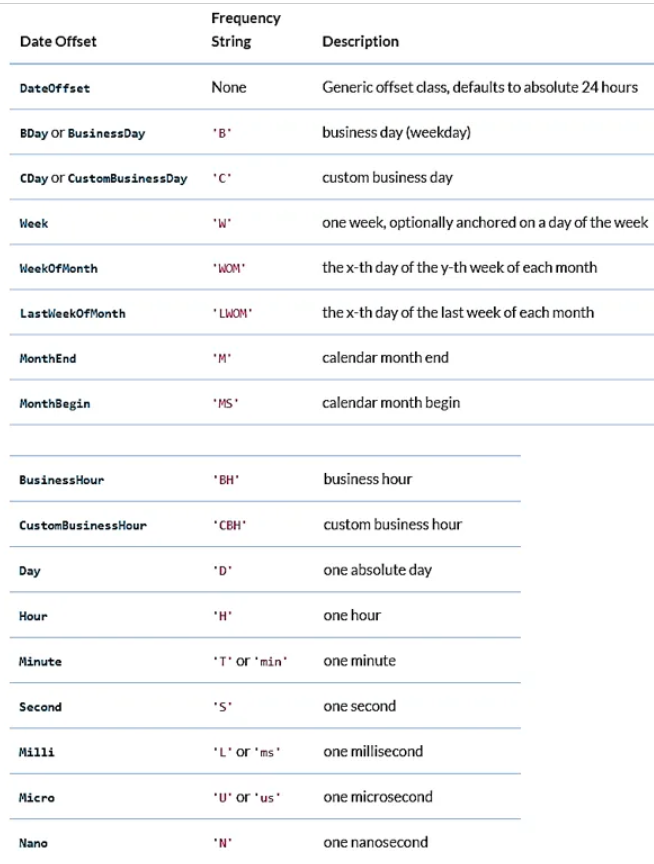

In [65]:
# First 5 records of dataset

df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


# Rule = 'A'

In [47]:
# Data for the minimum values of each variable on the last day of each year.

df_tesla.resample(rule='A').min()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,1.076000,1.108667,0.998667,1.053333,1.053333,1777500
2011-12-31,1.452000,1.484667,1.407333,1.455333,1.455333,3594000
2012-12-31,1.774667,1.790000,1.509333,1.519333,1.519333,5473500
2013-12-31,2.205333,2.225333,2.140667,2.194000,2.194000,6603000
2014-12-31,9.366667,9.800000,9.111333,9.289333,9.289333,19983000
2015-12-31,12.388667,12.619333,12.093333,12.333333,12.333333,10620000
2016-12-31,9.488000,10.331333,9.403333,9.578000,9.578000,24892500
2017-12-31,14.316667,14.688667,14.064000,14.466000,14.466000,32800500
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500


* **`resmaple` function works here becuase date variabel is in datetime datatype.**


* **This function considers the last day of each year, regardless of whether it's a Saturday or Sunday. However, it displays the data based on the minimum value for each year, rather than showing the minimum value of the last day.**


* **When clents asks for yearly data, then use this function.**



* **`df_tesla.resample('A').min()` would give you the minimum value of each variable for each year like minimum low, minimum high, minimum Open, minimum close & minimum stock price for each year.**


* **Here, the analysis of the data indicates that the minimum low value in 2020 was 23.367332. This means that 23.367332 was the lowest stock price recorded in the year 2019. However, in the year 2021, the lowest stock price was notably higher at 187.666672.**


In [48]:
# Data for the maximum values of each variable on the last day of each year

df_tesla.resample(rule='A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-31,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-31,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-31,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


* **`df_tesla.resample('A').max()` would provide you with the highest value of each variable on the last day of every year. This includes the maximum low, maximum high, maximum open, maximum close, and maximum stock price for each year.**


* **"Maximum high" refers to the highest stock price reached within a specific year.**


* **In 2023, the lowest low is 101.809998 and the highest high is 299.290009. This indicates that the price fluctuated within this range throughout the year 2023.**

<AxesSubplot:xlabel='Date'>

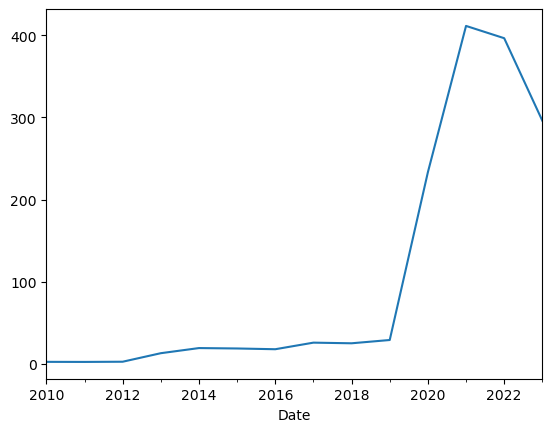

In [51]:
# year and frequency

df_tesla.resample(rule='A').max()['Open'].plot()

# Rule = 'B'

* **It shows the last trading day of each year.**


* **`B` Stands for bussiness here.**

In [56]:
## Business End Frequency
## https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

df_tesla.resample (rule='BA').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-12-31,2.391333,2.428000,2.316667,2.364667,2.364667,281494500
2011-12-30,2.308667,2.333333,2.268667,2.329333,2.329333,172767000
2012-12-31,2.546000,2.663333,2.474000,2.534000,2.534000,85206000
2013-12-31,12.930667,12.966667,12.558000,12.891333,12.891333,557458500
2014-12-31,19.177999,19.427999,18.693333,19.069332,19.069332,490225500
2015-12-31,18.680000,19.110001,18.420000,18.817333,18.817333,234744000
2016-12-30,17.763332,17.955999,16.967333,17.694668,17.694668,356136000
2017-12-29,25.779333,25.974001,25.290001,25.666668,25.666668,296871000
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500


# Rule = 'BQS'

* **`B` stand for Bussiness, `Q` stand for Quarter, `S` stands for Satrting.**


* **This displays data for the first day of each quarter in every year.**


* **In the data, you might notice that for the start date of the second or third quarter, such as on the 1st and 2nd days, it falls on a Saturday and Sunday respectively, and on the 3rd day, it's a Monday.**


* **Every 4 records indicates the data of 1 year.**

In [54]:
# Maximum value of each quater

df_tesla.resample (rule='BQS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-01,1.719333,2.028000,1.553333,1.592667,1.592667,281494500
2010-07-01,1.666667,1.728000,1.408667,1.465333,1.465333,123282000
2010-10-01,2.391333,2.428000,2.316667,2.364667,2.364667,139528500
2011-01-03,1.906000,1.914000,1.870000,1.896667,1.896667,172767000
2011-04-01,2.006667,2.100000,1.970000,2.009333,2.009333,93138000
2011-07-01,1.992667,2.029333,1.934000,1.982000,1.982000,45967500
2011-10-03,2.308667,2.333333,2.268667,2.329333,2.329333,58024500
2012-01-02,2.546000,2.663333,2.474000,2.529333,2.529333,82506000
2012-04-02,2.488667,2.564667,2.444667,2.534000,2.534000,83344500


<AxesSubplot:xlabel='Date'>

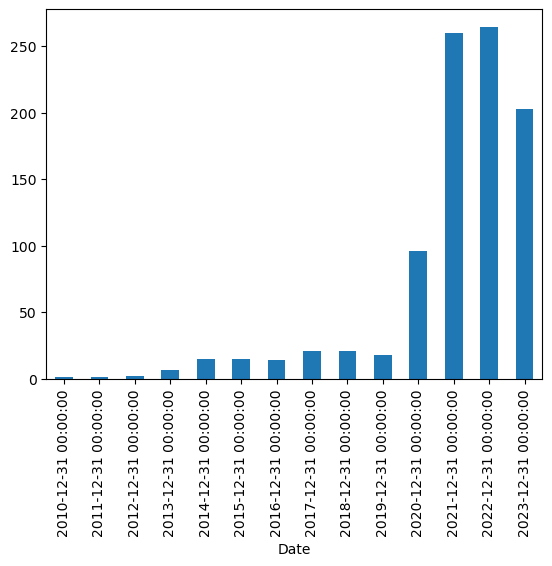

In [60]:
# mean of open variable for every year

df_tesla['Open'].resample(rule='A').mean().plot(kind='bar')

**This represents the average stock price for each year.**


**The average stock price in both 2021 and 2022 is considerably high, at around 250.**

# Rule = 'm'

**It retrieves monthly data for all months of all years.**

<AxesSubplot:xlabel='Date'>

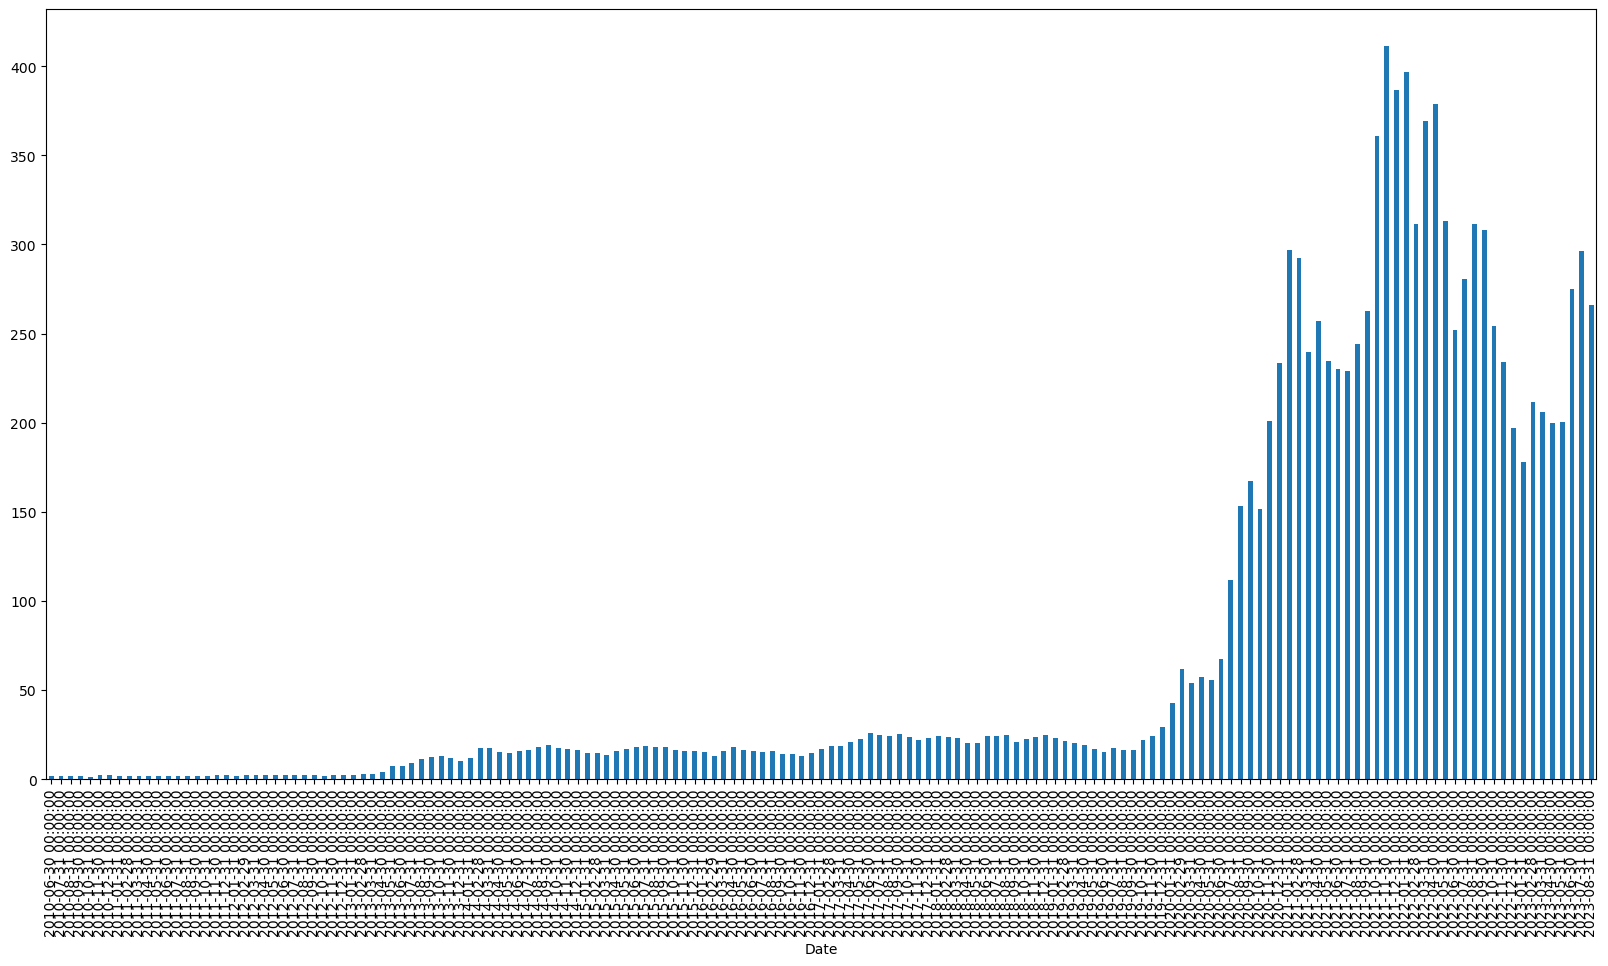

In [67]:
# Maximum value for each open variable for each month of each year

df_tesla['Open'].resample(rule='m').max().plot(kind='bar',figsize=(20,10))

In [82]:
# This code considers the maximum values of the "high" variable for the past 11 days.

df_tesla['High'].rolling(11).max().head(20)

Date
2010-06-29         NaN
2010-06-30         NaN
2010-07-01         NaN
2010-07-02         NaN
2010-07-06         NaN
2010-07-07         NaN
2010-07-08         NaN
2010-07-09         NaN
2010-07-12         NaN
2010-07-13         NaN
2010-07-14    2.028000
2010-07-15    2.028000
2010-07-16    1.728000
2010-07-19    1.540000
2010-07-20    1.483333
2010-07-21    1.483333
2010-07-22    1.483333
2010-07-23    1.483333
2010-07-26    1.483333
2010-07-27    1.483333
Name: High, dtype: float64

* **`.rolling()` function fetch given number of previous records**


* **The `"rolling"` parameter in time series analysis is used to calculate statistics or make calculations over a specific number of consecutive data points. This is useful for identifying trends and patterns in the data, compute moving average, and for smoothing out the data to make it easier to analyze.**


* **In the provided code, it retrieves the maximum values from the previous 11 days and displays that value on the 11th day. This pattern continues sequentially for subsequent days.**

In [83]:
# This code considers the values of  "Open" variable for the past 30 days and then calculates the average based on those values.

df_tesla['Open: 30 days rolling'] = df_tesla['Open'].rolling(30).mean() 

df_tesla.head(31)

,Open,High,Low,Close,Adj Close,Volume,Open: 30 days rolling,Open: 30 days rolling
Date,,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,NaN,NaN
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,NaN,NaN
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,NaN,NaN
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,NaN,NaN
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,NaN,NaN
2010-07-07,1.093333,1.108667,0.998667,1.053333,1.053333,103825500,NaN,NaN
2010-07-08,1.076000,1.168000,1.038000,1.164000,1.164000,115671000,NaN,NaN
2010-07-09,1.172000,1.193333,1.103333,1.160000,1.160000,60759000,NaN,NaN
2010-07-12,1.196667,1.204667,1.133333,1.136667,1.136667,33037500,NaN,NaN


* **Simple Moving average is implemented through  `rolling` function.**


* **`.rolling(11)` refers to calculating the moving average over a window of 30 days. This means that for the first 29 records, the moving average will be NaN (Not a Number) since there aren't enough data points to calculate the average.**


* **Calculating a moving average over 30 days, the moving average won't be available for the first 29 days because there are not enough preceding days to compute the average. The moving average will start being calculated from the 1st day onward.**


* **This function calculates the average over a specified number of days. For example, on day 30, it computes the average of the previous 29 days; on day 31, it computes the average of the preceding 29 days, and so on.**

# Graph of Moving Averge

### `Open Vs Open Moving Average`

**This is same chart which we view on trading view platform. Price Vs 30 days Moving Average.**

<AxesSubplot:xlabel='Date'>

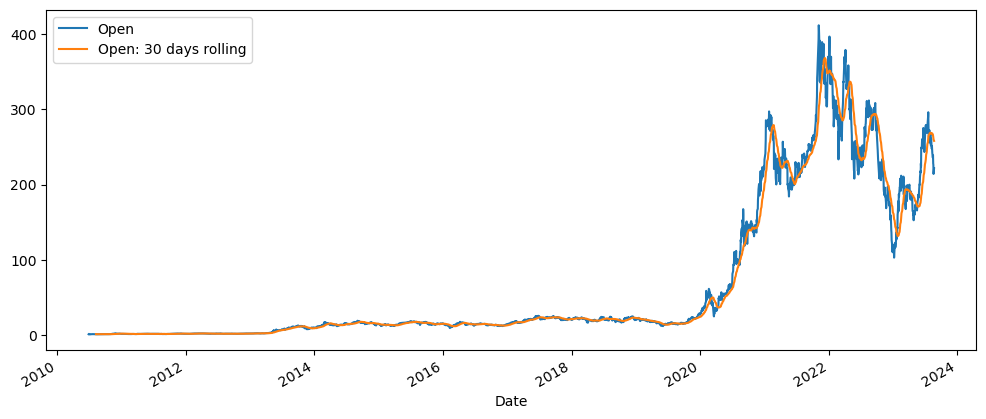

In [84]:
df_tesla[['Open', 'Open: 30 days rolling']].plot(figsize=(12,5))



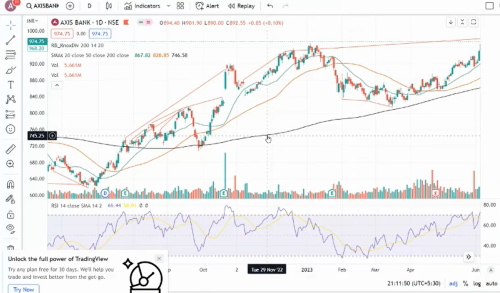

**This is known as Exploratory Data Analysis (EDA) for time series. The process involves these steps:** 

**1) Begin by visualizing the data using the pandas plot function.**


**2) Check if the date variable is in the right datetime format. If not, change its data type.**


**3) Set the date variable as the index.**


**4) Plot the distribution of original data, such as high, low, close, open prices.**


**5) Consider plotting all variable distributions in a single chart for a clearer view.****


**6) If you notice sudden changes in product prices or sales, your role as a data scientist is to find the reasons behind these changes.**


**7) Also, examine whether there's a pattern of seasonality, where sales are low in the same month of different years. This is usually not a major concern.**


**8) If there's no clear seasonality, investigate to find the reasons behind sudden variations.**


**9) Begin your analysis with a broader time span, like five years.**


**10) Then, delve deeper by focusing on one year's data.**


**11) Further analyze month by month to gather insights.**


**12) Resampling rules can aid your analysis:**


**(I) 'BQS' (Business Quarter Starting)**


**(II) 'A' (last day of each year)**


**(III) 'B' (last working day of each year)**


**(IV) 'M' (data for every month)**